In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.matrix([[0,1],[-0.1,-0.05]])
B = np.matrix([[0],[1]])
C = np.matrix([[1,0]])

x0 = np.random.rand(2,1)

print("A = \n", A)
print("B = \n", B)
print("C = \n", C)

A = 
 [[ 0.    1.  ]
 [-0.1  -0.05]]
B = 
 [[0]
 [1]]
C = 
 [[1 0]]


Input sequence shape:  (300,)
Number of steps:  600


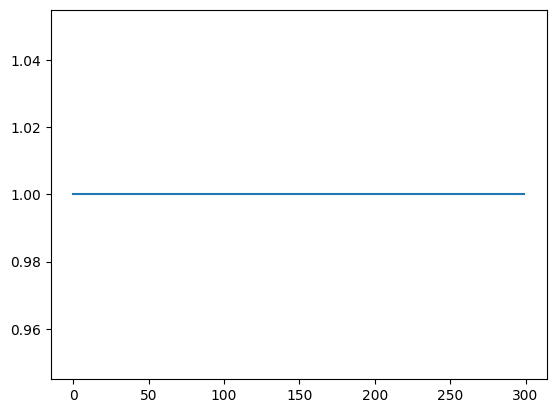

In [4]:
time = 300
sampling = 0.5

#define an input sequence for the simulation
input_seq = np.ones(time)
print("Input sequence shape: ", input_seq.shape)
num_steps = int(time / sampling)
print("Number of steps: ", num_steps)

plt.plot(input_seq)

#### The following function simulates the state-space model using the backward Euler method
#### The input parameters are:
####    -- A,B,C              - continuous time system matrices 
####    -- initial_state      - the initial state of the system 
####    -- time_steps         - the total number of simulation time steps 
####    -- sampling_perios    - the sampling period for the backward Euler discretization 
#### This function returns the state sequence and the output sequence
#### They are stored in the vectors Xd and Yd respectively

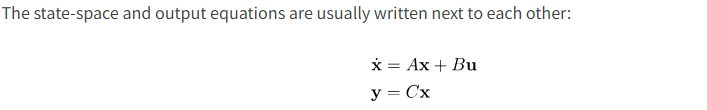

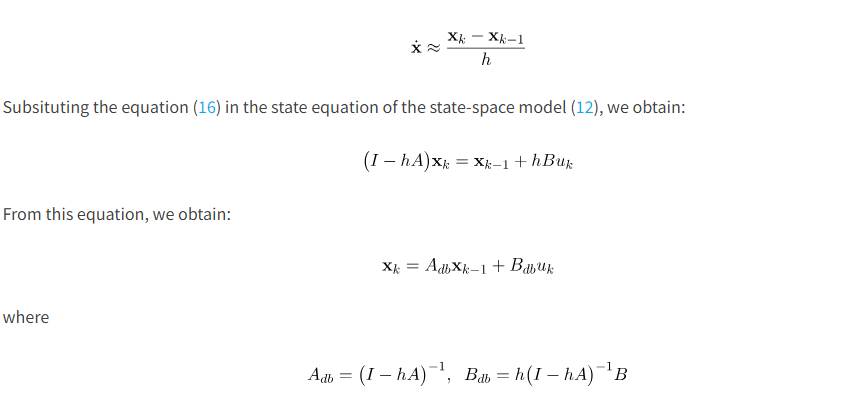

In [7]:
def simulate(A, B, C, initial_state, initial_sequence, time_steps, sampling_period):
    # Discretize the system using backward Euler method
    from numpy.linalg import inv
    n = A.shape[0]
    I = np.eye(n) # Identity matrix
    Ad = inv(I - sampling_period * A) # Discrete state matrix
    Bd = sampling_period * Ad @ B # Discrete input matrix

    # Initialize state and output sequences
    Xd = np.zeros((n, time_steps+1))
    Yd = np.zeros((C.shape[0], time_steps+1))

    # Simulate the system
    for k in range(0, time_steps):
        if k == 0:
            Xd[:, k:k+1] = initial_state # Set initial state
            Yd[:, k:k+1] = C @ Xd[:, k:k+1] # Initial output
            x = Ad*initial_state + Bd * initial_sequence[k]
            print("Initial state x0: \n", x)
            print("Initial output y0: \n", Yd[:, k:k+1])
        else:
            Xd[:, k:k+1] = x
            Yd[:, k:k+1] = C @ x
            x = Ad*x + Bd * initial_sequence[k]
            print(f"State at step {k}: \n", x)
            print(f"Output at step {k}: \n", Yd[:, k:k+1])
    Xd[:, [-1]] = x
    Yd[:, [-1]] = C @ x

    return Xd, Yd

state,output = simulate(A, B, C, x0, input_seq, time, sampling)

Initial state x0: 
 [[1.12668549]
 [0.93822868]]
Initial output y0: 
 [[0.65757115]]
State at step 1: 
 [[1.78473045]
 [1.31608991]]
Output at step 1: 
 [[1.12668549]]
State at step 2: 
 [[2.60704158]
 [1.64462227]]
Output at step 2: 
 [[1.78473045]]
State at step 3: 
 [[3.56621787]
 [1.91835256]]
Output at step 3: 
 [[2.60704158]]
State at step 4: 
 [[4.63290438]
 [2.13337302]]
Output at step 4: 
 [[3.56621787]]
State at step 5: 
 [[5.77658428]
 [2.28735981]]
Output at step 5: 
 [[4.63290438]]
State at step 6: 
 [[6.96636076]
 [2.37955295]]
Output at step 6: 
 [[5.77658428]]
State at step 7: 
 [[8.17171071]
 [2.41069992]]
Output at step 7: 
 [[6.96636076]]
State at step 8: 
 [[9.36319375]
 [2.38296608]]
Output at step 8: 
 [[8.17171071]]
State at step 9: 
 [[10.51310156]
 [ 2.29981561]]
Output at step 9: 
 [[9.36319375]]
State at step 10: 
 [[11.59603514]
 [ 2.16586717]]
Output at step 10: 
 [[10.51310156]]
State at step 11: 
 [[12.58939963]
 [ 1.98672897]]
Output at step 11: 
 [[11.5

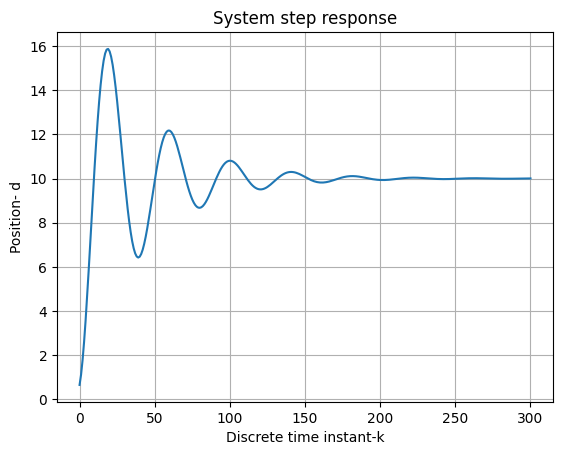

In [6]:
plt.plot(output[0,:])
plt.xlabel('Discrete time instant-k')
plt.ylabel('Position- d')
plt.title('System step response')
plt.grid()